ECE 4424 PROJECT Spring 2024
IRIS
By Chenglong Liao.

In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Use sklearn repo to get iris dataset. This set has 3 kind iris, 50 for each, total 150.

In [13]:

# loading data
iris = load_iris()
X = iris.data
y = iris.target



In [14]:
iris_df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  

Instead of manual, using PCA function in sklearn to dimensionality reduction the data from 4 to 2.

In [15]:
pca = PCA(n_components=2)  # reduce the dimention from 4 to 2
X_reduced = pca.fit_transform(X)



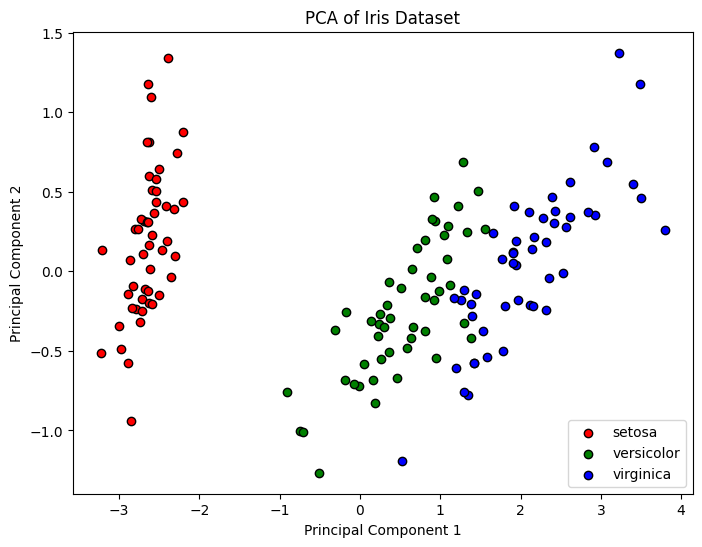

In [16]:
# create the figure after reduce the dimention.
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
labels = iris.target_names

for color, i, target_name in zip(colors, [0, 1, 2], labels):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], color=color, label=target_name, edgecolors='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

For 150 data, 7/10 of them used for trainning and 3/10 used for testing.

In [17]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:

mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1, warm_start=True, random_state=1, learning_rate_init=0.01)

# store the result for each epoch
epochs = 50
# according to the loss output later (use 100 for testing), it levelled of after epoch 42, so epochs set to 50.
train_accuracy = []
test_accuracy = []
loss_values = []

for epoch in range(epochs):
    mlp.fit(X_train_scaled, y_train)
    train_pred = mlp.predict(X_train_scaled)
    test_pred = mlp.predict(X_test_scaled)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    loss_values.append(mlp.loss_)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {mlp.loss_:.4f} - Train Accuracy: {train_acc:.4f} - Test Accuracy: {test_acc:.4f}")




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/50 - Loss: 1.3577 - Train Accuracy: 0.1619 - Test Accuracy: 0.1778
Epoch 2/50 - Loss: 1.2609 - Train Accuracy: 0.2000 - Test Accuracy: 0.2222
Epoch 3/50 - Loss: 1.1761 - Train Accuracy: 0.4381 - Test Accuracy: 0.4222
Epoch 4/50 - Loss: 1.1022 - Train Accuracy: 0.6095 - Test Accuracy: 0.5778
Epoch 5/50 - Loss: 1.0390 - Train Accuracy: 0.6381 - Test Accuracy: 0.5778
Epoch 6/50 - Loss: 0.9824 - Train Accuracy: 0.6952 - Test Accuracy: 0.6000
Epoch 7/50 - Loss: 0.9307 - Train Accuracy: 0.6952 - Test Accuracy: 0.6000
Epoch 8/50 - Loss: 0.8834 - Train Accuracy: 0.6952 - Test Accuracy: 0.6000
Epoch 9/50 - Loss: 0.8396 - Train Accuracy: 0.6952 - Test Accuracy: 0.6000
Epoch 10/50 - Loss: 0.7980 - Train Accuracy: 0.6952 - Test Accuracy: 0.6000
Epoch 11/50 - Loss: 0.7574 - Train Accuracy: 0.7048 - Test Accuracy: 0.6222
Epoch 12/50 - Loss: 0.7184 - Train Accuracy: 0.7143 - Test Accuracy: 0.6222
Epoch 13/50 - Loss: 0.6814 - Train Accuracy: 0.7143 - Test Accuracy: 0.6222
Epoch 14/50 - Loss: 0

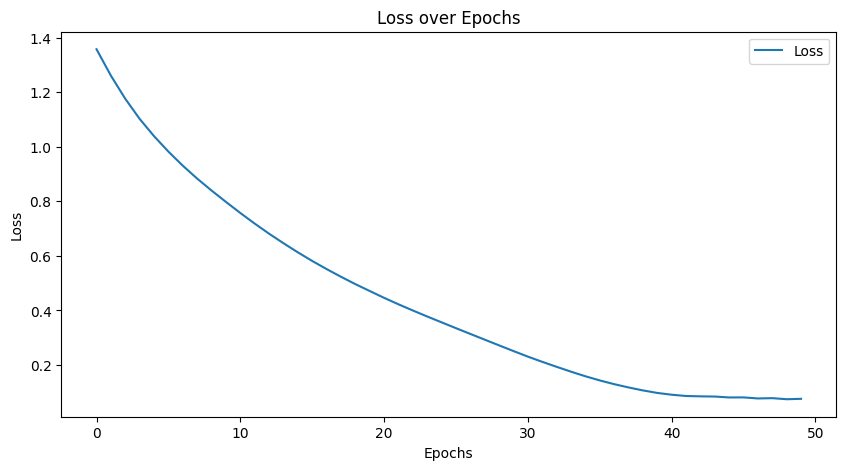

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(loss_values, label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

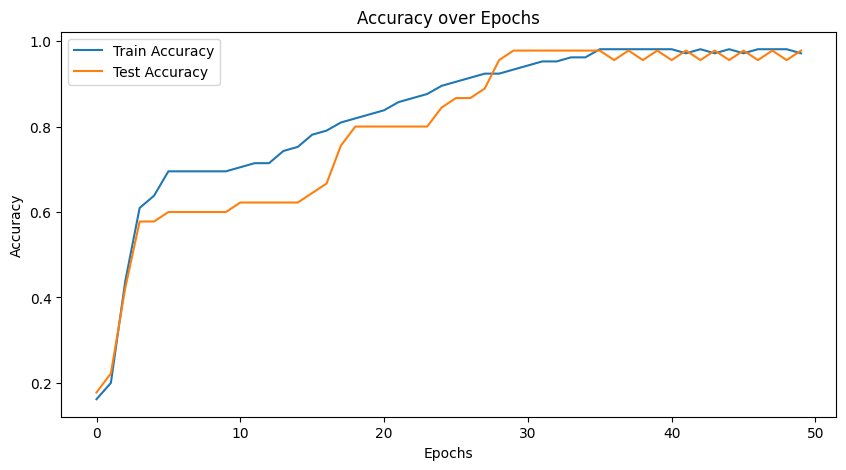

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()